In [1]:
import pandas as pd
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Vix Data

In [2]:
vix = pd.read_csv("data/vixcurrent.csv")[['Date', 'VIX Close']]
vix.columns = ['Date', 'VIX']
vix['Date'] = pd.to_datetime(vix.Date)
vix = vix.set_index('Date')

vvix = pd.read_csv("data/vvixtimeseries.csv")
vvix.columns = ['Date', 'VVIX']
vvix['Date'] = pd.to_datetime(vvix.Date)
vvix = vvix.set_index('Date')

rvx = pd.read_csv("data/rvxdailyprices.csv")[['Date', 'Close']]
rvx.columns = ['Date', 'RVX']
rvx['Date'] = pd.to_datetime(rvx.Date)
rvx = rvx.set_index('Date')

vxn = pd.read_csv("data/vxncurrent.csv")[['Date', 'Close']]
vxn.columns = ['Date', 'VXN']
vxn['Date'] = pd.to_datetime(vxn.Date)
vxn = vxn.set_index('Date')

vxd = pd.read_csv("data/vxdohlcprices.csv")[['Date', 'Close']]
vxd.columns = ['Date', 'VXD']
vxd['Date'] = pd.to_datetime(vxd.Date)
vxd = vxd.set_index('Date')

### Index Data

In [3]:
spx = pd.read_csv("data/S&P 500 Historical Data.csv")[['Date', 'Price']]
spx.columns = ['Date', 'SPX']
spx['Date'] = pd.to_datetime(spx.Date)
spx = spx.set_index('Date')

djx = pd.read_csv("data/Dow Jones Industrial Average Historical Data.csv")[['Date', 'Price']]
djx.columns = ['Date', 'DJX']
djx['Date'] = pd.to_datetime(djx.Date)
djx = djx.set_index('Date')

ndx = pd.read_csv("data/Nasdaq 100 Historical Data.csv")[['Date', 'Price']]
ndx.columns = ['Date', 'NDX']
ndx['Date'] = pd.to_datetime(ndx.Date)
ndx = ndx.set_index('Date')

rsx = pd.read_csv("data/US Small Cap 2000 Historical Data.csv")[['Date', 'Price']]
rsx.columns = ['Date', 'RSX']
rsx['Date'] = pd.to_datetime(rsx.Date)
rsx = rsx.set_index('Date')

### Plots

In [4]:
data = pd.concat([
    vix,
    vvix,
    rvx,
    vxn,
    vxd,
    spx,
    djx,
    ndx,
    rsx
], axis=1).dropna()
data['SPX'] = data.SPX.str.replace(",", "")
data['NDX'] = data.NDX.str.replace(",", "")
data['DJX'] = data.DJX.str.replace(",", "")
data['RSX'] = data.RSX.str.replace(",", "")
data = data.astype(float).reset_index()

### SPX

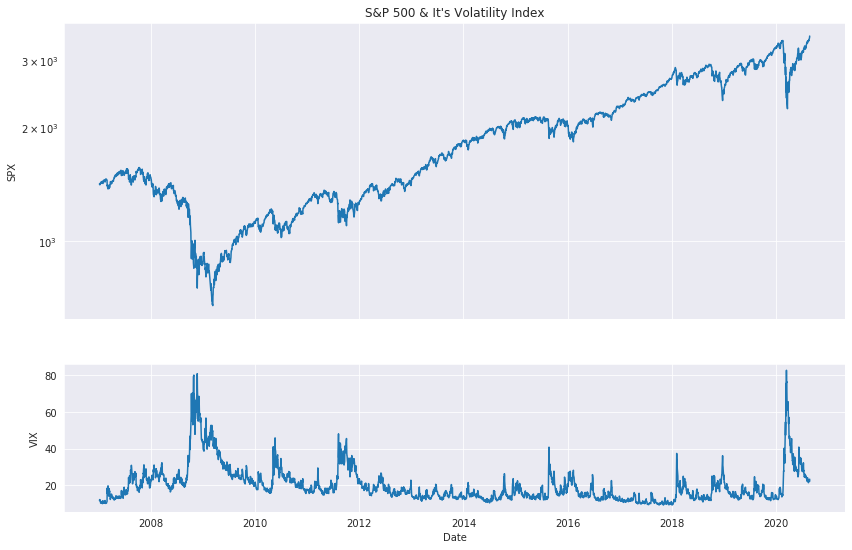

In [5]:
f, ax = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, figsize=(14, 9))
ax[0].set_title("S&P 500 & It's Volatility Index")
sns.lineplot(x='Date', y='SPX', data=data, ax=ax[0])
ax[0].set(yscale="log")
sns.lineplot(x='Date', y='VIX', data=data, ax=ax[1])
plt.savefig("plots/spx_vol_idx.png")

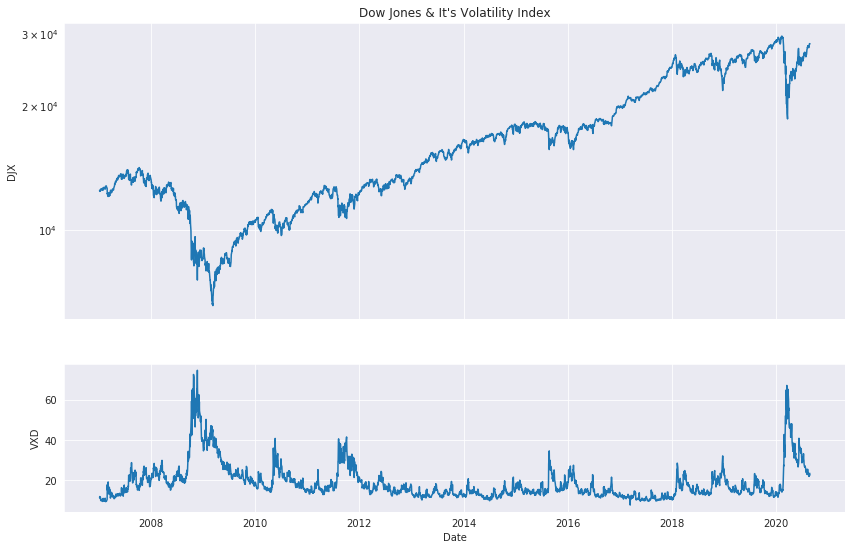

In [6]:
f, ax = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, figsize=(14, 9))
ax[0].set_title("Dow Jones & It's Volatility Index")
sns.lineplot(x='Date', y='DJX', data=data, ax=ax[0])
ax[0].set(yscale="log")
sns.lineplot(x='Date', y='VXD', data=data, ax=ax[1])
plt.savefig("plots/djx_vol_idx.png")

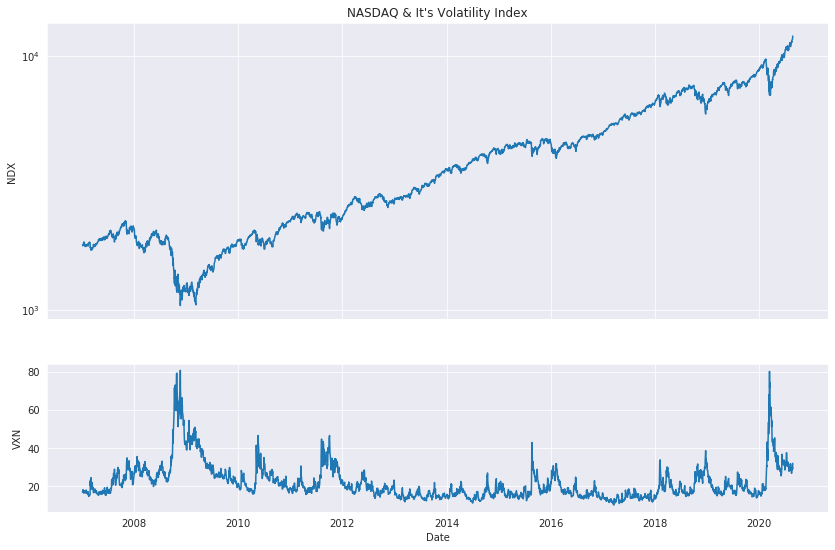

In [7]:
f, ax = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, figsize=(14, 9))
ax[0].set_title("NASDAQ & It's Volatility Index")
sns.lineplot(x='Date', y='NDX', data=data, ax=ax[0])
ax[0].set(yscale="log")
sns.lineplot(x='Date', y='VXN', data=data, ax=ax[1])
plt.savefig("plots/ndx_vol_idx.png")

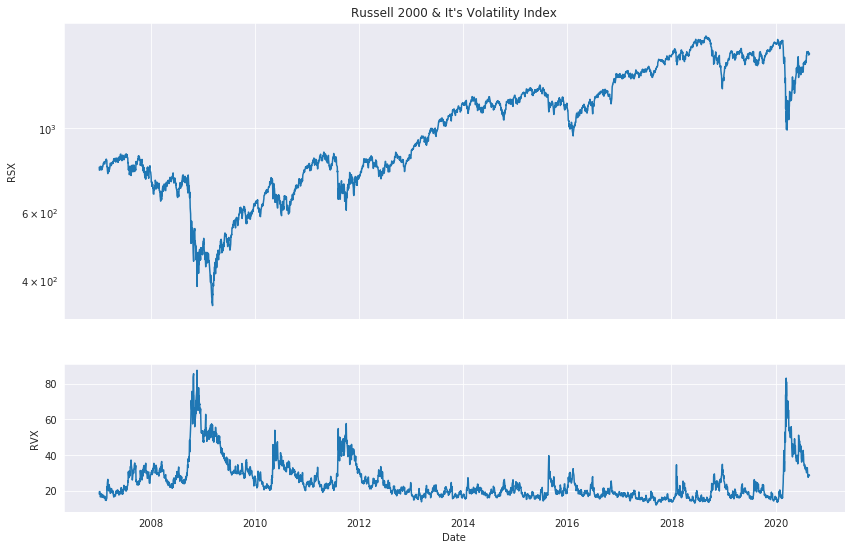

In [8]:
f, ax = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, figsize=(14, 9))
ax[0].set_title("Russell 2000 & It's Volatility Index")
sns.lineplot(x='Date', y='RSX', data=data, ax=ax[0])
ax[0].set(yscale="log")
sns.lineplot(x='Date', y='RVX', data=data, ax=ax[1])
plt.savefig("plots/rsx_vol_idx.png")

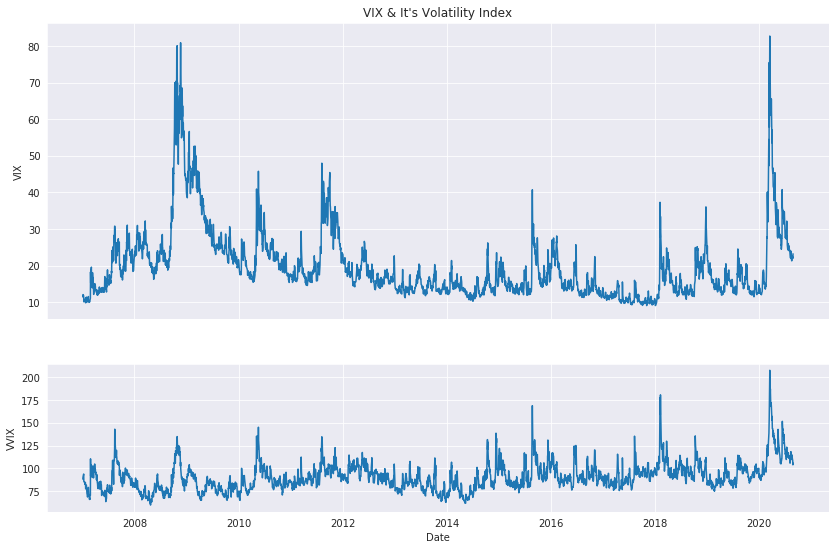

In [9]:
f, ax = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, figsize=(14, 9))
ax[0].set_title("VIX & It's Volatility Index")
sns.lineplot(x='Date', y='VIX', data=data, ax=ax[0])
sns.lineplot(x='Date', y='VVIX', data=data, ax=ax[1])
plt.savefig("plots/vix_vol_idx.png")

### Variance Premium

In [10]:
rvol = data.copy()[['VIX', 'SPX', 'DJX', 'NDX', 'RSX']].pct_change()
rvol = rvol.iloc[::-1].reset_index(drop=True)
rvol = rvol.rolling(30, min_periods=30).std() * np.sqrt(252) * 100
rvol = rvol.iloc[::-1].reset_index(drop=True)

data['SPXRVOL'] = rvol.SPX
data['DJXRVOL'] = rvol.DJX
data['NDXRVOL'] = rvol.NDX
data['RSXRVOL'] = rvol.RSX
data['VIXRVOL'] = rvol.VIX

data = data.dropna()

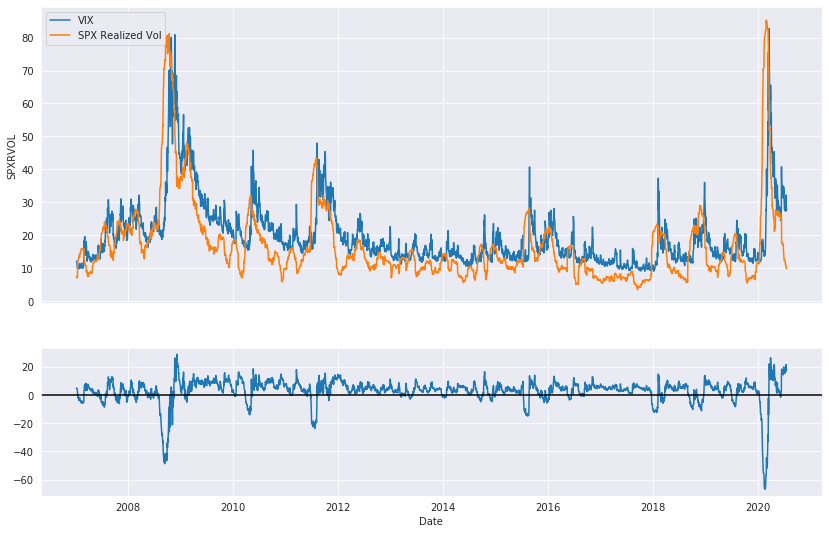

In [11]:
f, ax = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, figsize=(14, 9))
sns.lineplot(x='Date', y='VIX', data=data, label='VIX', ax=ax[0])
sns.lineplot(x='Date', y='SPXRVOL', label='SPX Realized Vol', data=data, ax=ax[0])
sns.lineplot(x='Date', y=(data.VIX - data.SPXRVOL), data=data, ax=ax[1])
ax[1].axhline(y=0, color="black")
plt.savefig("plots/spx_realized_vol.png")

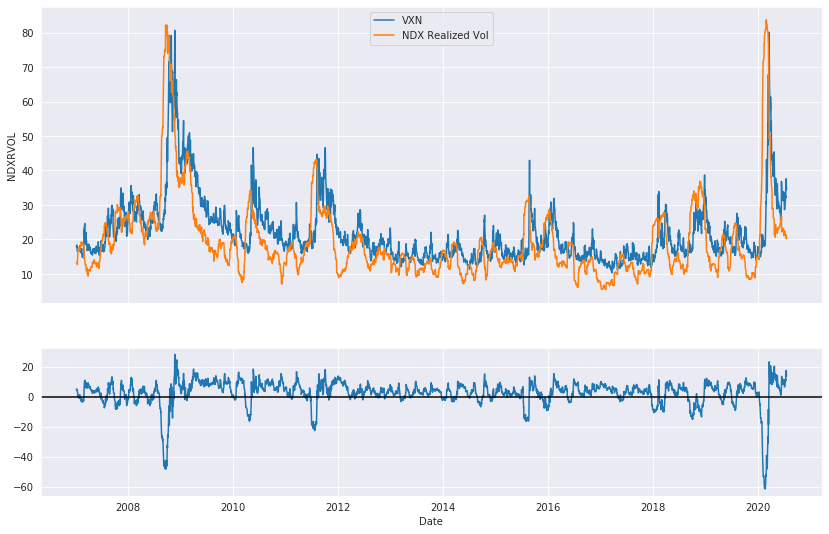

In [12]:
f, ax = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios' : [2, 1]}, figsize=(14, 9))
sns.lineplot(x='Date', y='VXN', data=data, label='VXN', ax=ax[0])
sns.lineplot(x='Date', y='NDXRVOL', label='NDX Realized Vol', data=data, ax=ax[0])
sns.lineplot(x='Date', y=(data.VXN - data.NDXRVOL), data=data, ax=ax[1])
ax[1].axhline(y=0, color="black")
plt.savefig("plots/ndx_realized_vol.png")

### Relative Value

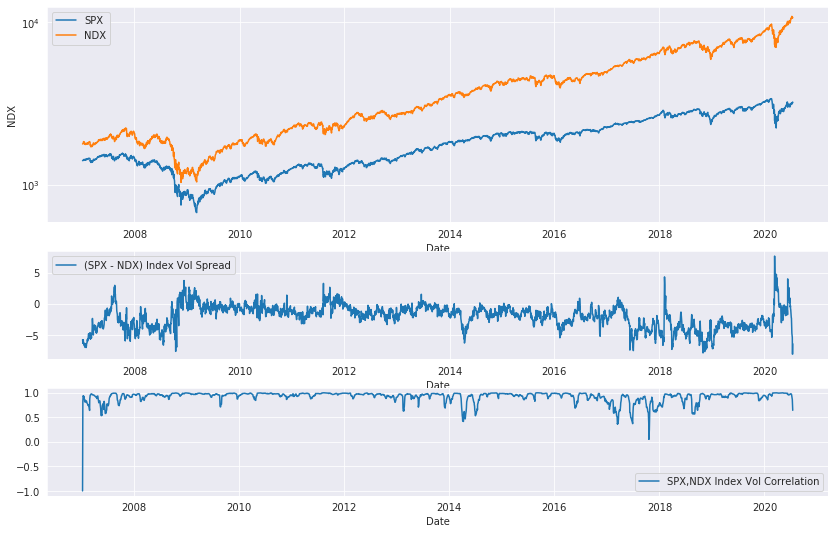

In [127]:
rel = data[['Date', 'SPX', 'NDX', 'RSX', 'VXN', 'VIX', 'RVX']].reset_index(drop=True)
f, ax = plt.subplots(3, 1, figsize=(14, 9), gridspec_kw = {"height_ratios" : [2, 1, 1]})
sns.lineplot(x='Date', y=rel.SPX, data=rel, ax=ax[0], label="SPX")
sns.lineplot(x='Date', y=rel.NDX, data=rel, ax=ax[0], label="NDX")
ax[0].set(yscale="log")
sns.lineplot(x='Date', y=rel.VIX - rel.VXN, data=rel, label="(SPX - NDX) Index Vol Spread", ax=ax[1])
sns.lineplot(x='Date', y=rel.VXN.rolling(30, min_periods=1).corr(rel.VIX), data=rel, label="SPX,NDX Index Vol Correlation", ax=ax[2])
plt.savefig("plots/spx_ndx_pair.png")

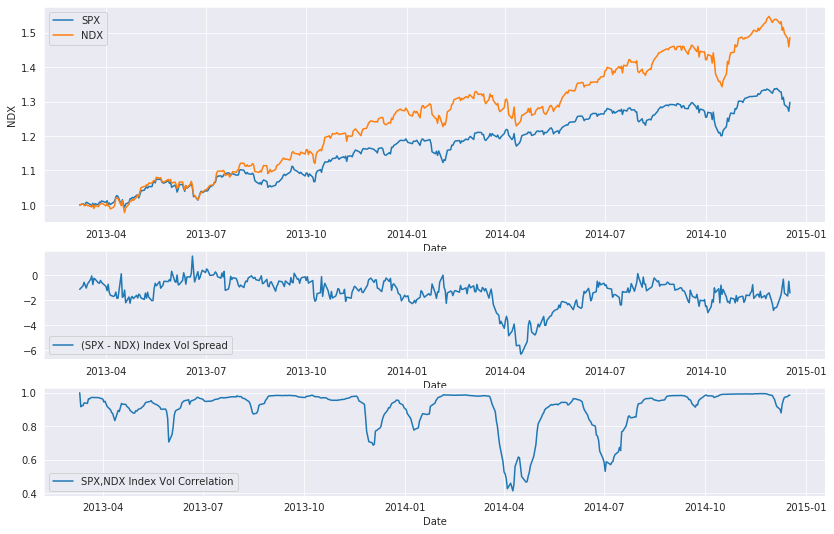

In [128]:
rel = data[['Date', 'SPX', 'NDX', 'RSX', 'VXN', 'VIX', 'RVX']].reset_index(drop=True)
rel = rel.iloc[1550:2000]
f, ax = plt.subplots(3, 1, figsize=(14, 9), gridspec_kw = {"height_ratios" : [2, 1, 1]})
rel['SPX'] = rel.SPX / rel.SPX.values[0]
rel['NDX'] = rel.NDX / rel.NDX.values[0]
sns.lineplot(x='Date', y=rel.SPX, data=rel, ax=ax[0], label="SPX")
sns.lineplot(x='Date', y=rel.NDX, data=rel, ax=ax[0], label="NDX")
sns.lineplot(x='Date', y=rel.VIX - rel.VXN, data=rel, label="(SPX - NDX) Index Vol Spread", ax=ax[1])
sns.lineplot(x='Date', y=rel.VXN.rolling(30, min_periods=1).corr(rel.VIX), data=rel, label="SPX,NDX Index Vol Correlation", ax=ax[2])
plt.savefig("plots/spx_ndx_pair_signal.png")